In [1]:
import numpy as np
import pandas as pd
import dask.dataframe as dd

from matplotlib import ticker

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%%bash

if ! [[ -f ../data/AmpC_screen_table__withscores.csv ]]; then
    sed -e '/no_score/d' ../data/AmpC_screen_table.csv > ../data/AmpC_screen_table__withscores.csv
fi

if ! [[ -f ../data/D4_screen_table__withscores.csv ]]; then
    sed -e '/no_score/d' ../data/D4_screen_table.csv > ../data/D4_screen_table__withscores.csv
fi

In [3]:
%%time

datasets = {'AmpC':'../data/AmpC_screen_table__withscores.csv',
            'D4':'../data/D4_screen_table__withscores.csv'
           }

dfs = []
for name, path in datasets.items():
    df = dd.read_csv(path)
    df['proj'] = name
    dfs.append(df)

raw_data = dd.concat(dfs).compute(num_workers = 16)

CPU times: user 5min 28s, sys: 50.8 s, total: 6min 19s
Wall time: 4min 42s


# Plot normalized and not normalized data

In [42]:
df = (
    raw_data
#     .query('dockscore < 0')
    .sample(500_000)
    .reset_index()
)

In [43]:
colors = sns.color_palette("colorblind", 2)
colors

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549)]

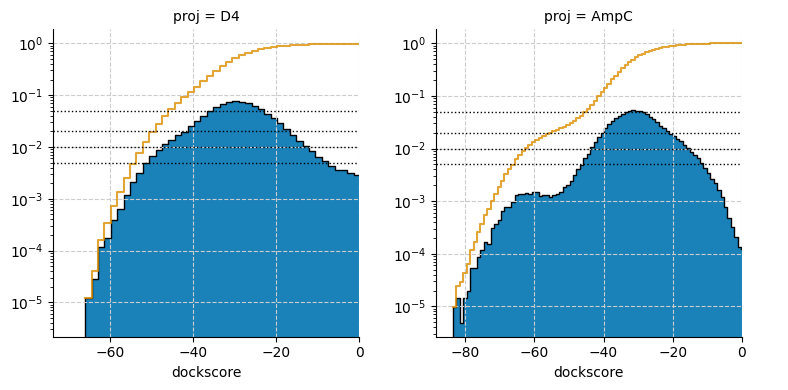

In [46]:
kwa = {
#     'color':'proj',
    'x':'dockscore',
    'bins':100,
    'stat':'probability',
}

grid = sns.FacetGrid(df, 
                     col = "proj",
                     margin_titles=True, sharex=False, sharey=False,
                     height=4, aspect=1.
                    )
(grid
 .map_dataframe(sns.histplot, **kwa, 
                color=colors[0], 
                alpha=0.9, 
                discrete=False,
                element='step',
                linewidth=1,
                edgecolor='black',
               )
 .set(yscale = 'log')
)

(grid
 .map_dataframe(sns.histplot, **kwa, 
                color=colors[1], 
                alpha=0.8, 
                cumulative=True, element="step", fill=False, 
               )
 .set(yscale = 'log')
)

for ax in grid.axes.flat:
    ...
#     ax.yaxis.set_major_formatter(ticker.EngFormatter())
#     ax.yaxis.set_minor_locator(AutoMinorLocator(4))
    ax.set_ylabel('')
    ax.grid(which='major', color='#CCCCCC', linestyle='--')
    
    for y_value in [0.5e-2, 1e-2, 2e-2, 5e-2]:
        ax.axhline(y_value, color='black', linestyle=':', linewidth=1.0)
#     ax.grid(which='minor', color='#CCCCCC', linestyle=':')
    ax.set_xlim(None, 0)
#     plt.setp(ax.get_yticklabels(), rotation=90)


# grid.set_titles(row_template = '{row_name}', col_template = '{col_name}')
grid.set_titles()
grid.add_legend()

plt.savefig('../figures/Figure_1.png')
plt.show()

In [ ]:
fig, axs = plt.subplots(1, 2, sharex=False, sharey=True, figsize=(10,4))

for dataset, ax in zip(datasets, axs):
    subdf = df[df.proj == dataset]
    ax.hist(
        subdf.dockscore,
        bins=100,
        label=dataset
    )
fig.legend()
plt.show()

plt.savefig('../figures/Figure_1.png')

In [ ]:
fig = plt.figure(figsize = (12,6))
ax = fig.gca()
df.query('dockscore < 0').hist('dockscore', bins=100, by='proj', ax=ax)
plt.savefig('../figures/Figure_1.png')

In [ ]:
df.value_counts('proj')

In [ ]:
raw_data = df.copy(deep=True)

In [ ]:
(
)